<a href="https://colab.research.google.com/github/chinox02/TugasDLTM4_Yudharso-Pala/blob/main/Tugas%20DLTM_Yudharso%20pala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [3]:
image_data='/content/drive/MyDrive/datasetTM4deeplearning/dataset'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,Ahegao
1,Surprise
2,Neutral
3,Happy
4,Sad
5,Angry


In [4]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/content/drive/MyDrive/datasetTM4deeplearning/...,Happy
1,/content/drive/MyDrive/datasetTM4deeplearning/...,Surprise
2,/content/drive/MyDrive/datasetTM4deeplearning/...,Angry
3,/content/drive/MyDrive/datasetTM4deeplearning/...,Happy
4,/content/drive/MyDrive/datasetTM4deeplearning/...,Ahegao
...,...,...
595,/content/drive/MyDrive/datasetTM4deeplearning/...,Sad
596,/content/drive/MyDrive/datasetTM4deeplearning/...,Neutral
597,/content/drive/MyDrive/datasetTM4deeplearning/...,Happy
598,/content/drive/MyDrive/datasetTM4deeplearning/...,Ahegao


In [5]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/content/drive/MyDrive/datasetTM4deeplearning/...,Neutral
1,/content/drive/MyDrive/datasetTM4deeplearning/...,Neutral
2,/content/drive/MyDrive/datasetTM4deeplearning/...,Angry
3,/content/drive/MyDrive/datasetTM4deeplearning/...,Surprise
4,/content/drive/MyDrive/datasetTM4deeplearning/...,Surprise
...,...,...
595,/content/drive/MyDrive/datasetTM4deeplearning/...,Surprise
596,/content/drive/MyDrive/datasetTM4deeplearning/...,Surprise
597,/content/drive/MyDrive/datasetTM4deeplearning/...,Angry
598,/content/drive/MyDrive/datasetTM4deeplearning/...,Happy


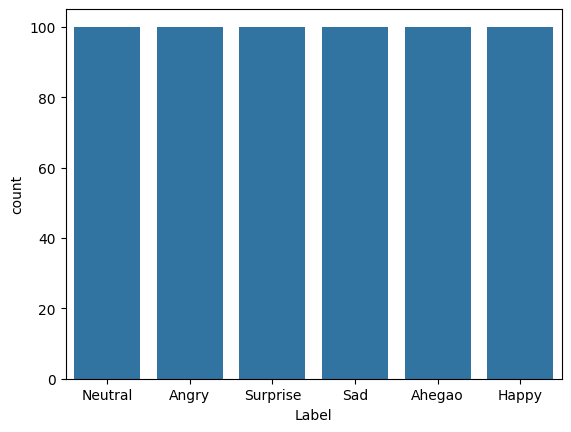

In [6]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 0);

In [7]:
train_data_dir =image_data
batch_size = 64
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 600 files belonging to 6 classes.
Using 480 files for training.
Found 600 files belonging to 6 classes.
Using 120 files for validation.


In [8]:
train_size = len(train)
val_size = len(validation)
total = train_size + val_size

print(f'train samples count:\t\t{train_size}\t({(100 * train_size/total):.2f}%)')
print(f'validation samples count:\t{val_size}\t({(100 * val_size/total):.2f}%)')
print('================================================')
print(f'Total:\t\t\t\t{total}\t({(100 * total/total):.2f}%)')

train samples count:		8	(80.00%)
validation samples count:	2	(20.00%)
Total:				10	(100.00%)


In [9]:
class_names=train.class_names
class_names

['Ahegao', 'Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']

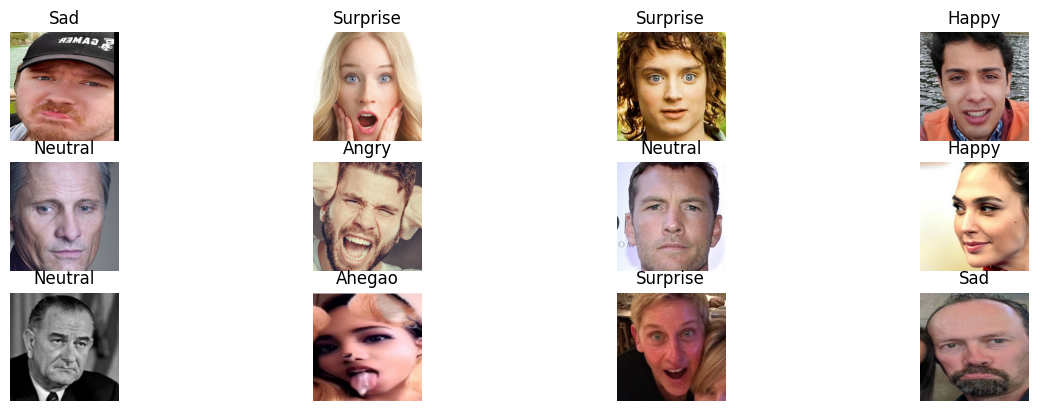

In [10]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(12):
        ax = plt.subplot(12, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
base_model = tf.keras.applications.EfficientNetV2M(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(6,activation=tf.nn.softmax))
keras_model.summary()

214201816/214201816 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-m (Function  (None, 7, 7, 1280)        53150388  
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 6)                 376326    
                                                                 
Total params: 53526714 (204.19 MB)
Trainable params: 376326 (1.44 MB)
Non-trainable params: 53150388 (202.75 MB)
_________________________________________________________________


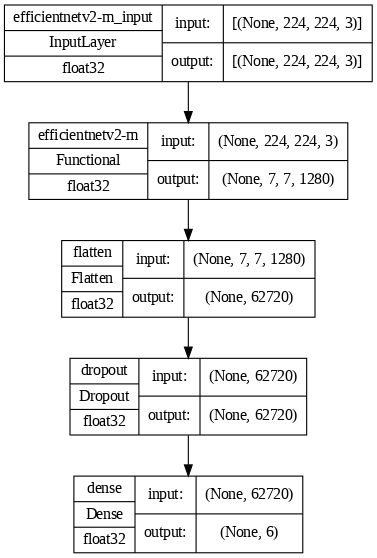

In [12]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

In [13]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [14]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [15]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=50,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/50
8/8 [==============================] - 244s 27s/step - loss: 2.5687 - accuracy: 0.3688 - val_loss: 1.0035 - val_accuracy: 0.6917
Epoch 2/50
8/8 [==============================] - 257s 33s/step - loss: 0.6411 - accuracy: 0.8000 - val_loss: 0.5450 - val_accuracy: 0.8417
Epoch 3/50
8/8 [==============================] - 202s 26s/step - loss: 0.3944 - accuracy: 0.8521 - val_loss: 0.4657 - val_accuracy: 0.8917
Epoch 4/50
8/8 [==============================] - 205s 26s/step - loss: 0.1753 - accuracy: 0.9375 - val_loss: 0.3925 - val_accuracy: 0.8917
Epoch 5/50
8/8 [==============================] - 198s 25s/step - loss: 0.1037 - accuracy: 0.9625 - val_loss: 0.3856 - val_accuracy: 0.9083
Epoch 6/50
8/8 [==============================] - 197s 25s/step - loss: 0.0989 - accuracy: 0.9688 - val_loss: 0.4632 - val_accuracy: 0.9083
Epoch 7/50
8/8 [==============================] - 210s 26s/step - loss: 0.0570 - accuracy: 0.9750 - val_loss: 0.4499 - val_accuracy: 0.9083
Epoch 8/50
8/8 [====

In [16]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

2/2 [==============================] - 38s 16s/step - loss: 0.3856 - accuracy: 0.9083
Test Loss = 0.38561904430389404
Test Accuracy = 0.9083333611488342


In [17]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,2.568738,0.368750,1.003533,0.691667
1,0.641125,0.800000,0.544993,0.841667
2,0.394384,0.852083,0.465683,0.891667
3,0.175307,0.937500,0.392496,0.891667
4,0.103652,0.962500,0.385619,0.908333
5,0.098929,0.968750,0.463218,0.908333
6,0.057045,0.975000,0.449943,0.908333
7,0.031297,0.991667,0.394221,0.908333
8,0.031317,0.985417,0.394207,0.908333
9,0.026924,0.993750,0.430672,0.916667


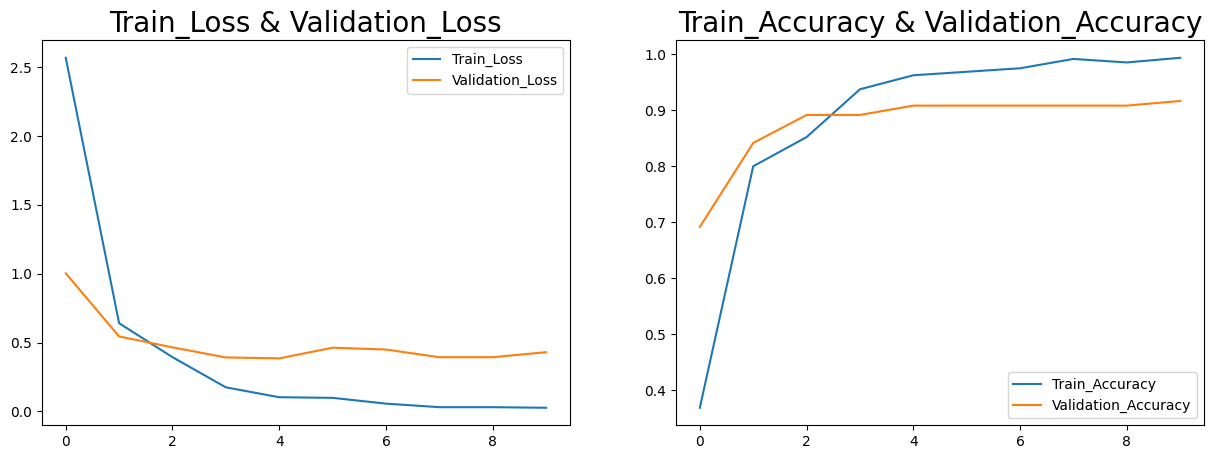

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()